Selected Measurement: Grid Organi lbc


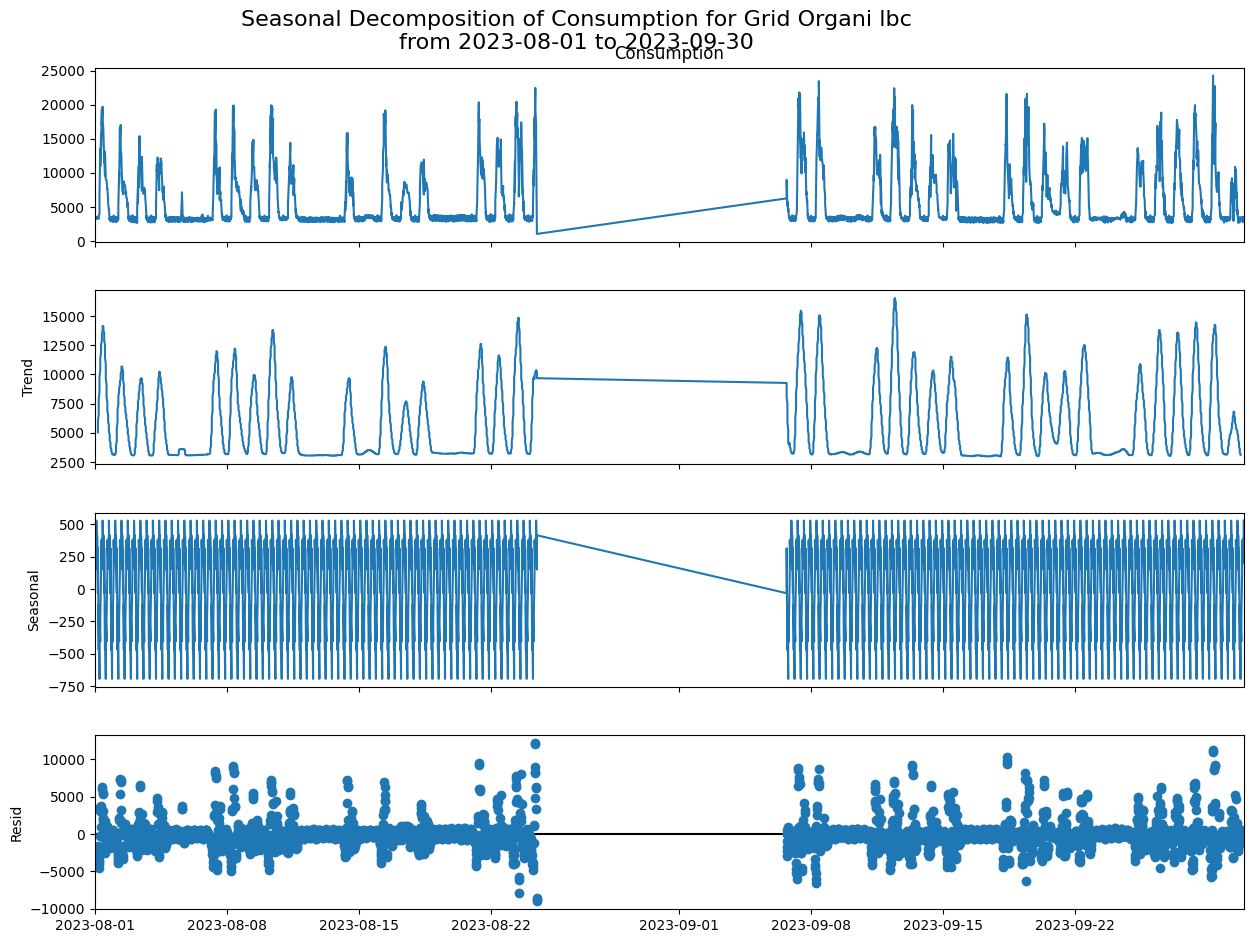

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read your data, parsing the 'Hour' column as datetime and using it as the index
df = pd.read_csv('../api_data/hourly_api_data.csv', parse_dates=['Hour'], index_col='Hour')

# Sort the DataFrame by the datetime index
df = df.sort_index()

# Filter the DataFrame to only include data between August and September 2023
df_filtered = df.loc['2023-08-01':'2023-09-30']

# Optionally, select a specific measurement.
# For example, choose the first unique measurement in the filtered data.
selected_measurement = df_filtered['Measurement'].unique()[0]
print(f"Selected Measurement: {selected_measurement}")

# Filter the data for the selected measurement and focus on the 'Consumption' column
series_data = df_filtered[df_filtered['Measurement'] == selected_measurement]['Consumption']

# Ensure the series is numeric
series = pd.to_numeric(series_data, errors='coerce')

# Decompose the series.
# For hourly data with daily seasonality, set period=24.
decomposition = seasonal_decompose(series.dropna(), model='additive', period=24)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle(f'Seasonal Decomposition of Consumption for {selected_measurement}\nfrom 2023-08-01 to 2023-09-30', fontsize=16)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read your data, parsing the 'Hour' column as datetime and using it as the index
df = pd.read_csv('../api_data/hourly_api_data.csv', parse_dates=['Hour'], index_col='Hour')

# Sort the DataFrame by the datetime index
df = df.sort_index()

# Optionally, filter for a specific measurement.
# Here we select the first unique measurement found in the 'Measurement' column.
selected_measurement = df['Measurement'].unique()[0]
print(f"Selected Measurement: {selected_measurement}")

# Filter the data for the selected measurement and select the 'Consumption' column
series_data = df[df['Measurement'] == selected_measurement]['Consumption']

# Ensure the data is numeric
series = pd.to_numeric(series_data, errors='coerce')

# Decompose the series. For hourly data with daily seasonality, set period = 24.
decomposition = seasonal_decompose(series.dropna(), model='additive', period=24)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle(f'Seasonal Decomposition of Consumption for {selected_measurement}', fontsize=16)
plt.show()


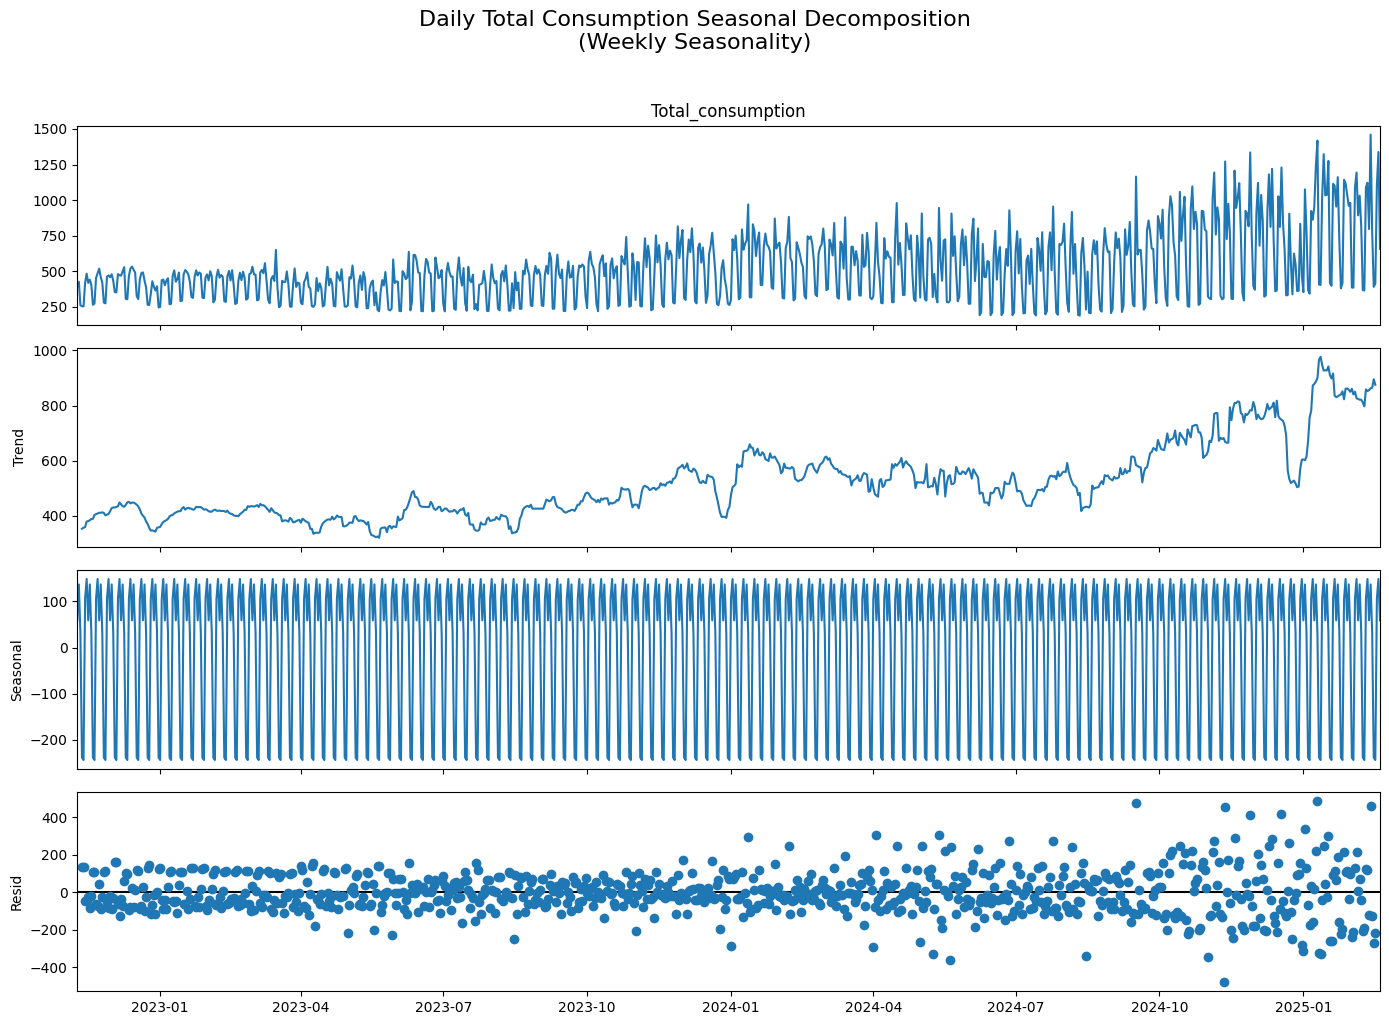

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read data with 'day' column as datetime index
df = pd.read_csv('../api_data/daily_cleaned3.csv', 
                 parse_dates=['Day'], 
                 index_col='Day')

# Sort by datetime index
df = df.sort_index()

# Use total_consumption column directly
series = pd.to_numeric(df['Total_consumption'], errors='coerce')

# Decompose with weekly seasonality (period=7)
decomposition = seasonal_decompose(series.dropna(), model='additive', period=7)

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle(
    'Daily Total Consumption Seasonal Decomposition\n(Weekly Seasonality)',
    fontsize=16,
    y=1.02
)
plt.tight_layout()
plt.show()